<a href="https://colab.research.google.com/github/ehsankarami1358/ehsan/blob/main/PCA02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from numpy.linalg import svd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [36]:
from sklearn.datasets import load_digits

In [37]:
digits=load_digits()

In [38]:
data=digits.data
lebel=digits.target
data.shape

(1797, 64)

In [39]:
set(lebel)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

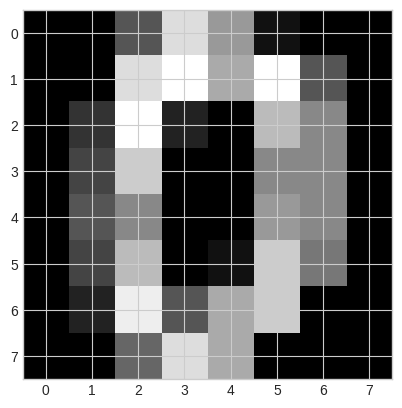

In [40]:

image_sample=data[0,:].reshape(8,8)
plt.imshow(image_sample,cmap='gray')


In [41]:
pca_digits=PCA()
pca_digits2=PCA(2)
PC_dig1=pca_digits.fit_transform(data)
PC_dig2=pca_digits2.fit_transform(data)
PC_dig2.shape

(1797, 2)

In [42]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<ipython-input-43-978a497c4717>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c_map=plt.cm.get_cmap('jet',10)


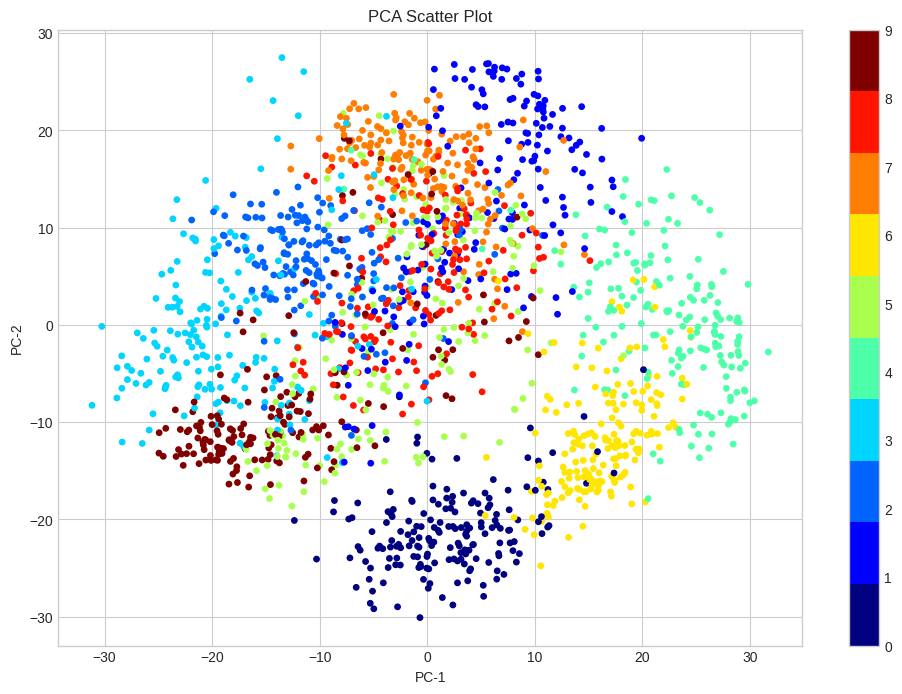

In [43]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(12,8))
c_map=plt.cm.get_cmap('jet',10)
plt.scatter(PC_dig2[:,0],PC_dig2[:,1],s=15,cmap=c_map,c=digits.target)
plt.colorbar()
plt.xlabel('PC-1'),plt.ylabel('PC-2')
plt.title('PCA Scatter Plot')
plt.show()

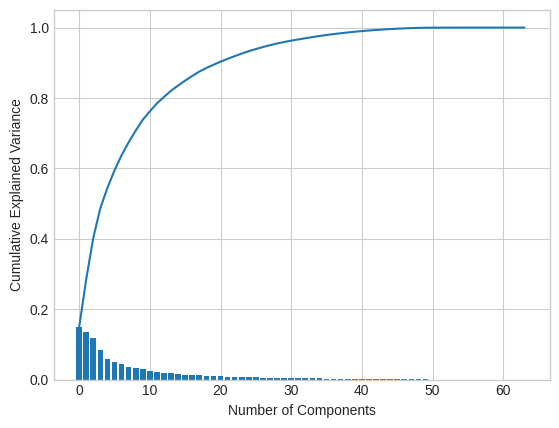

In [44]:
plt.bar(np.arange(64),pca_digits.explained_variance_ratio_)
plt.plot(np.cumsum(pca_digits.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [45]:
total_var=np.cumsum(pca_digits.explained_variance_ratio_)*100
for i in [0,1,2,3,4,9,19,29,39]:
  print('pca_digits {:2d},explained var :{:.2f}'.format(i+1,total_var[i]))

pca_digits  1,explained var :14.89
pca_digits  2,explained var :28.51
pca_digits  3,explained var :40.30
pca_digits  4,explained var :48.71
pca_digits  5,explained var :54.50
pca_digits 10,explained var :73.82
pca_digits 20,explained var :89.43
pca_digits 30,explained var :95.91
pca_digits 40,explained var :98.82


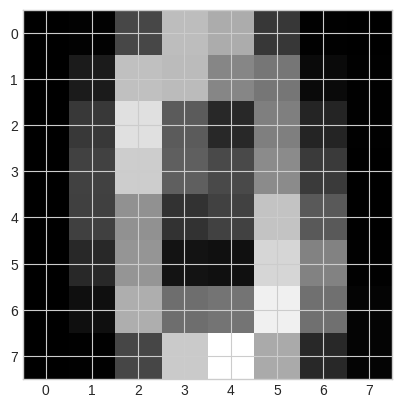

In [46]:
im=pca_digits2.inverse_transform(PC_dig2)
image_sample=im[0,:].reshape(8,8)
plt.imshow(image_sample,cmap='gray')